# Part I Four Randomized Algorithms

In [ ]:
#Imports
import mlrose
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function wrapper that allows to count the number of time a function is called

class counter:
    #wraps a function, to keep a running count of how many
    #times it's been called
    def __init__(self, func):
        self.func = func
        self.count = 0

    def __call__(self, *args, **kwargs):
        self.count += 1
        return self.func(*args, **kwargs)

## Problem 1 Pattern Parity

In [113]:
# Optimization problem 1 pattern "0110":

def parity_pattern_optimum(size_vector, pattern):
    return size_vector//len(pattern)



def pattern_parity_fitness(state,pattern):
    score =0
    k=0
    while k < (state.shape[0]-len(pattern)+1):
        count =0
        for i in range(len(pattern)):
            if(pattern[i] == state[k+i]):
                count+=0.1
            else:
                break
        if count == len(pattern):
            score+=1
            k = k +len(pattern)
        else:
            k=k+1
    return score

kwargs = {'pattern': [0,1,0,1,0]}
wrapped_pattern_parity_fitness= counter(pattern_parity_fitness)
fitness_parity_pattern = mlrose.CustomFitness(wrapped_pattern_parity_fitness, **kwargs)

## Problem 2 4-Mirror

In [201]:
# Optimization problem 2 4Mirror :

import time

def four_mirror_optimum(size_vector):
    return size_vector//4



def four_mirror_fitness(state):
    score = 0
    N = state.shape[0]//4
    for k in range(N):
        if(state[k] == state[k+N]) and (state[k] == state[k+2*N]) and (state[k] == state[k+3*N]) and state[k]==1:
            score+=5
        elif(state[k] == state[k+N]) and (state[k] == state[k+2*N]) and (state[k] == state[k+3*N]):
            score+=4
        elif(state[k] == state[k+N]) and (state[k+2*N] == state[k+3*N]) :
            score+=3          
        elif(state[k] == state[k+N]):
            score+=1
        elif(state[k+2*N] == state[k+3*N]):
            score+=1
        else:
            score+=0
        
    #time.sleep(0.00014)       
    return score

wrapped_four_mirror_fitness= counter(four_mirror_fitness)
fitness_four_mirror = mlrose.CustomFitness(wrapped_four_mirror_fitness)



## Parameters of Algorithms

In [187]:
brute_time = True #Don't stop your research while there is still time
max_time = 10

# Random Hill Climbing
params_RDH = {'max_iters':np.inf,'max_attempts':10000000, 'restarts':100000, 'init_state':None, 'curve':False, 
              'random_state':None, 'max_time':max_time, 'brute_time':brute_time, 'full_explore':True}

# Simulated Annealing
params_SA = {'max_attempts':100000, 'max_iters':np.inf, 'init_state':None, 'curve':False, 'random_state':None, 'max_time':max_time, 'brute_time':brute_time} # Take the default exponential decay rate

# Genetic Algorithm
params_GA = {'pop_size':200, 'mutation_prob':0.1, 'max_attempts':10, 'max_iters':np.inf, 'curve':False, 'random_state':None, 'max_time':max_time, 'brute_time':brute_time}

# Mimic Algorithm
params_MIMIC = {'pop_size':200, 'keep_pct':0.2, 'max_attempts':10, 'max_iters':np.inf, 'curve':False, 'random_state':None, 'max_time':max_time, 'brute_time':brute_time}
algorithms = [{'key':'RDH', 'color':'SteelBlue','params':params_RDH,'name':'Random Hill Climbing','alg':mlrose.random_hill_climb,'num':1},
               {'key':'SA', 'color':'FireBrick', 'params':params_SA, 'name':'Simulated Annealing','alg':mlrose.simulated_annealing,'num':2},
               {'key':'GA', 'color':'SeaGreen', 'params':params_GA, 'name':'Genetic Algorithm','alg':mlrose.genetic_alg,'num':3},
               {'key':'MIMIC', 'color':'DarkOrange', 'params':params_MIMIC, 'name':'Mutual Information Maximizing Input Clustering','alg':mlrose.mimic,'num':4}]

In [11]:
# Compute result given a problem and an algorithm
import time
def compute_results_discrete(algorithm,problem,kwargs={},save=True):
    results = algorithm(problem,**kwargs)
    if(save):
        np.save("./variables/"+str(int(time.time())),results)
    return results
    
    

In [12]:
# Create a mlrose problem
def generate_problem(problem, kwargs):
    return problem(**kwargs)

In [143]:
# Function that compute the results function of input size and create figures
import pickle
import time
def compute_results(problem_name, problem_type, args_problem,algorithms,max_time=np.inf, max_input=40,min_input=10,step=7,coeff=3,repeat_range=40):
    result =[]
    for algorithm in algorithms:
        result.append({'key':algorithm['key']})
        for size_input in range(min_input,max_input,step):
            args_problem['length'] = size_input*coeff
            #if(algorithm['key'] in ['SA','RDH']):
            #    algorithm['params']['max_attempts'] = int(1*args_problem['length'])
            #if(algorithm['key'] in ['GA','MIMIC']):
            #    algorithm['params']['max_attempts'] = int(0.15*args_problem['length'])
            if(max_time!=np.inf):
                algorithm['params']['max_time'] = max_time
            problem_generated  = generate_problem(problem_type,args_problem)
            result[len(result)-1][args_problem['length']] = []
            start = time.time()
            for repeat in range(repeat_range):
                print (algorithm['key'] + "size_input :"+ str(size_input)+"repeat:"+str(repeat), end="\r")
                result[len(result)-1][args_problem['length']].append(compute_results_discrete(algorithm['alg'],problem_generated, kwargs=algorithm['params'], save=False)[1])
            end = time.time()
            number_calls = args_problem['fitness_fn'].fitness_fn.count
            args_problem['fitness_fn'].fitness_fn.count = 0
            result[len(result)-1][args_problem['length']].append((end-start)/repeat)
            result[len(result)-1][args_problem['length']].append(number_calls//repeat)



    pickle.dump( result, open( "./variables/"+problem_name+"_"+"_max_input-"+str(max_input)+"_min_input-"+str(min_input)
                              +"_step-"+str(step)+"_coeff-"+str(coeff)+"_repeat-"+str(repeat)+"_"+str(int(time.time()))+".p", "wb" ) )

    for algo in result:
        keys = algo.keys()
        key_list = []
        for key in keys:
            key_list.append(key)

    key_list.pop(0)

    plt.title(problem_name+" score function of input size")
    plt.xlabel("Input Size")
    plt.ylabel("Score")
    input_values = np.array(key_list)
    n = 0
    for algo in result:
        mean_values = []
        std_values = []
        for key in key_list:
            temp_list = algo[key][:len(algo[key])-2]
            temp_array = np.array(temp_list)
            mean_values.append(np.mean(temp_array))
            std_values.append(np.std(temp_array))

        mean_values = np.array(mean_values)
        std_values = np.array(std_values)
        min_values = mean_values - std_values
        max_values = mean_values + std_values
        plt.plot(input_values, mean_values, label=algo['key'], color=algorithms[n]['color'])
        plt.fill_between(input_values, min_values, max_values, color=algorithms[n]['color'], alpha=0.1)
        n+=1

    plt.tight_layout()
    plt.legend(loc="best")
    plt.savefig('./graph/'+problem_name+"_"+"_max_input-"+str(max_input)+"_min_input-"+str(min_input)
                              +"_step-"+str(step)+"_coeff-"+str(coeff)+"_repeat-"+str(repeat)+"_"+str(int(time.time()))+'.png')
    plt.show()
    return result


## Compute results for each problem

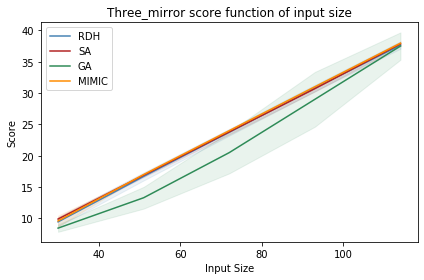

In [17]:
# Problem X three mirrors:(old problem)
problem_name = "Three_mirror"
problem_type = mlrose.DiscreteOpt
args_problem = {'length':10,'fitness_fn':fitness_three_mirror, 'maximize':True, 'max_val':2}
results = compute_results(problem_name, problem_type, args_problem,algorithms,max_time=np.inf, max_input=40,min_input=10,step=7,coeff=3,repeat_range=10 )

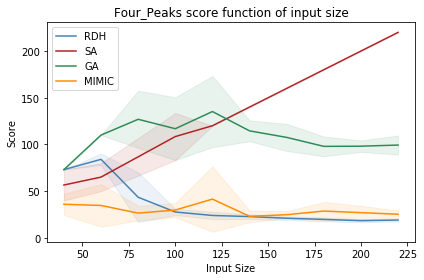

In [144]:
# Problem 3 four peaks
four_peaks_fitness = mlrose.FourPeaks(t_pct=0.15)
wrapped_fitness_four_peaks = counter(four_peaks_fitness.evaluate)
fitness_four_peaks = mlrose.CustomFitness(wrapped_fitness_four_peaks)

problem_name = "Four_Peaks"
problem_type = mlrose.DiscreteOpt
args_problem = {'length':10,'fitness_fn':fitness_four_peaks, 'maximize':True, 'max_val':2}
#size_input = 80
coeff = 1
repeat_range = 20
results = compute_results(problem_name, problem_type, args_problem,algorithms,max_time=5, max_input=240,min_input=40,step=20,coeff=1,repeat_range=10 )

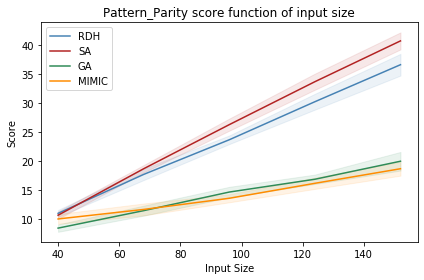

In [19]:
# Problem 2 pattern parity :
problem_name = "Pattern_Parity"
problem_type = mlrose.DiscreteOpt
args_problem = {'length':10,'fitness_fn':fitness_parity_pattern, 'maximize':True, 'max_val':2}
results = compute_results(problem_name, problem_type, args_problem,algorithms,max_time=0.2, max_input=35,min_input=10,step=7,coeff=4,repeat=40 )
        

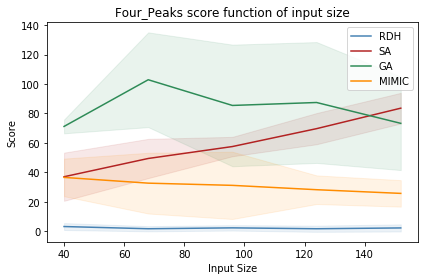

In [138]:
# Problem 3 four peaks
four_peaks_fitness = mlrose.FourPeaks(t_pct=0.15)
wrapped_fitness_four_peaks = counter(four_peaks_fitness.evaluate)
fitness_four_peaks = mlrose.CustomFitness(wrapped_fitness_four_peaks)

problem_name = "Four_Peaks"
problem_type = mlrose.DiscreteOpt
args_problem = {'length':10,'fitness_fn':fitness_four_peaks, 'maximize':True, 'max_val':2}
results = compute_results(problem_name, problem_type, args_problem, max_input=35,min_input=10,step=7,coeff=4,repeat=40 )

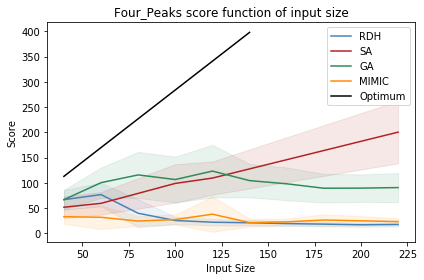

In [154]:
# Code to plot graph function of size

result = results
for algo in result:
        keys = algo.keys()
        key_list = []
        for key in keys:
            key_list.append(key)

key_list.pop(0)


plt.title(problem_name+" score function of input size")
plt.xlabel("Input Size")
plt.ylabel("Score")
input_values = np.array(key_list)
n = 0
for algo in result:
    mean_values = []
    std_values = []
    for key in key_list:
        temp_list = algo[key][:len(algo[key])-1]
        temp_array = np.array(temp_list)
        mean_values.append(np.mean(temp_array))
        std_values.append(np.std(temp_array))

    mean_values = np.array(mean_values)
    std_values = np.array(std_values)
    min_values = mean_values - std_values
    max_values = mean_values + std_values
    plt.plot(input_values, mean_values, label=algo['key'], color=algorithms[n]['color'])
    plt.fill_between(input_values, min_values, max_values, color=algorithms[n]['color'], alpha=0.1)
    n+=1
    truncated = input_values[0:6]
plt.plot(truncated,2.85*truncated-1, label='Optimum', color='black')
plt.tight_layout()
plt.legend(loc="best")
plt.savefig('./graph/'+problem_name+str(int(time.time()))+'.png')
plt.show()

In [163]:
# Function to compute results function of time
import pickle
import time
def compute_results_time(problem_name, problem_type, args_problem,algorithms, size_input,coeff=3,repeat_range=40):
    result =[]
    for algorithm in algorithms:
        result.append({'key':algorithm['key']})
        args_problem['length'] = size_input*coeff
        print(args_problem['length'])
        algorithm['params']['mode_time'] = True
        if(algorithm['key'] in ['RDH']):
            algorithm['params']['max_attempts'] = int(2*args_problem['length'])
        problem_generated  = generate_problem(problem_type,args_problem)
        algorithm['params']['curve'] = True
        for repeat in range(repeat_range):
            problem_generated  = generate_problem(problem_type,args_problem)
            result[len(result)-1][repeat] = []
            print (algorithm['key'] +"repeat:"+str(repeat), end="\r")
            result[len(result)-1][repeat].append(compute_results_discrete(algorithm['alg'],problem_generated, kwargs=algorithm['params'], save=False))
        number_calls = args_problem['fitness_fn'].fitness_fn.count
        args_problem['fitness_fn'].fitness_fn.count = 0
        result[len(result)-1][repeat].append(number_calls//repeat)

    pickle.dump( result, open( "./variables/"+"TIME_"+problem_name+"_"+"_size_input-"+str(size_input)+"_coeff-"+str(coeff)+"_repeat-"+str(repeat)+"_"+str(int(time.time()))+".p", "wb" ) )

    return result

In [ ]:
def score_time_interpolation(results,repeat_range,size_input,coeff):
    algo_scores_times = []
    for k in range(len(results)):
        algo = results[k]
        # get highest start time and lowest finish time for all repeats
        key = algo['key']
        print(key)
        start = 0
        finish = 999
        for r in range(repeat_range):
            arr_times = algo[r][0][3]
            if(start<arr_times[0]):
                start = arr_times[0]
            if(finish>arr_times[arr_times.shape[0]-1]):
                finish = arr_times[arr_times.shape[0]-1]
        x = np.linspace(start, finish, num = arr_times.shape[0])
        y_interp = []
        for r in range(repeat_range):
            arr_times = algo[r][0][3]
            score_values = algo[r][0][2]
            y_interp.append(np.interp(x,arr_times,score_values))


        algo_scores_times.append({'key':key, 'scores':y_interp, 'times':x})

    pickle.dump( algo_scores_times, open( "./variables/"+"algo_scores_times_"+problem_name+"_"+"_size_input-"+str(size_input)+"_coeff-"+str(coeff)+"_repeat-"+str(repeat_range)+"_"+str(int(time.time()))+".p", "wb" ) )
    return algo_scores_times

def compute_mean_and_std_scores(scores):
    stacked = np.stack(scores)
    meanArr = np.zeros_like(scores[0])
    stdArr = np.zeros_like(scores[0])
    for k in range(stacked.shape[1]):
        meanArr[k] = np.mean(stacked[:,k])
        stdArr[k] = np.std(stacked[:,k])
    return [meanArr,stdArr]




from numba import autojit

@autojit
def GPU_compute_mean_and_std_scores(scores):
    stacked = np.stack(scores)
    meanArr = np.zeros_like(scores[0])
    stdArr = np.zeros_like(scores[0])
    for k in range(stacked.shape[1]):
        meanArr[k] = np.mean(stacked[:,k])
        stdArr[k] = np.std(stacked[:,k])
    return [meanArr,stdArr]


## Resolution of various problems

### Parameters

In [137]:
problem_name = "Maximum_Pattern_Count"
problem_type = mlrose.DiscreteOpt
# PARAMETERS
args_problem = {'length':10,'fitness_fn':fitness_parity_pattern, 'maximize':True, 'max_val':2}
size_input = 5*20
coeff = 1
repeat_range = 10

In [107]:
problem_name = "Three_mirror"
problem_type = mlrose.DiscreteOpt
# PARAMETERS
size_input = 25
args_problem = {'length':size_input,'fitness_fn':fitness_three_mirror, 'maximize':True, 'max_val':2}
coeff = 3
repeat_range = 10

In [21]:
# Problem 3 four peaks
four_peaks_fitness = mlrose.FourPeaks(t_pct=0.15)
wrapped_fitness_four_peaks = counter(four_peaks_fitness.evaluate)
fitness_four_peaks = mlrose.CustomFitness(wrapped_fitness_four_peaks)

problem_name = "Four_Peaks"
problem_type = mlrose.DiscreteOpt
args_problem = {'length':10,'fitness_fn':fitness_four_peaks, 'maximize':True, 'max_val':2}
size_input = 80
coeff = 1
repeat_range = 20

In [208]:
problem_name = "Four_mirror"
problem_type = mlrose.DiscreteOpt
# PARAMETERS
size_input = 50
args_problem = {'length':size_input,'fitness_fn':fitness_four_mirror, 'maximize':True, 'max_val':2}
coeff = 4
repeat_range = 20

In [185]:
problem_name = "Chain_Problem"
problem_type = mlrose.DiscreteOpt
# PARAMETERS
size_input = 80
args_problem = {'length':size_input,'fitness_fn':fitness_chain, 'maximize':True, 'max_val':2}
coeff = 1
repeat_range = 20

### Compute results

In [209]:
#COMPUTE
results = compute_results_time(problem_name, problem_type, args_problem,algorithms, size_input=size_input,coeff=coeff,repeat_range=repeat_range)

200
200repeat:19
200epeat:19
200epeat:19


### Interpolation

In [205]:
#INTERPOLATE
algo_scores_times = score_time_interpolation(results,repeat_range,size_input,coeff)

RDH
SA
GA
MIMIC


In [60]:
#COMPUTE MEAN AND STD
mean_arrays = []
std_arrays = []
for i in range(4):
    [mean,std] = compute_mean_and_std_scores(algo_scores_times[i]['scores'])
    mean_arrays.append(mean)
    std_arrays.append(std)


In [206]:
#COMPUTE MEAN AND STD USING NUMBA
mean_arrays = []
std_arrays = []
for i in range(4):
    [mean,std] = GPU_compute_mean_and_std_scores(algo_scores_times[i]['scores'])
    mean_arrays.append(mean)
    std_arrays.append(std)

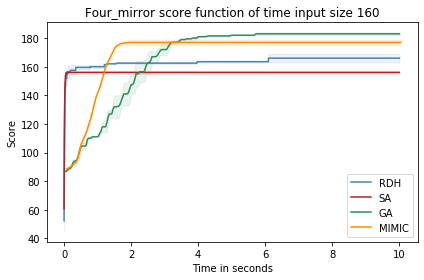

In [207]:
# PLOT CURVES


plt.title(problem_name+" score function of time input size "+str(size_input*coeff))
plt.xlabel("Time in seconds")
plt.ylabel("Score")

for algo in algorithms:
    num = algo['num']
    mean_values = mean_arrays[num-1]
    std_values = std_arrays[num-1]
    min_values = mean_values - std_values
    max_values = mean_values + std_values
    input_values = algo_scores_times[num-1]['times']
    plt.plot(input_values, mean_values, label=algo['key'], color=algo['color'])
    plt.fill_between(input_values, min_values, max_values, color=algo['color'], alpha=0.1)

plt.tight_layout()
plt.legend(loc="best")
plt.savefig('./graph/'+"TIME_SCORING_"+problem_name+str(int(time.time()))+'.png')
plt.show()

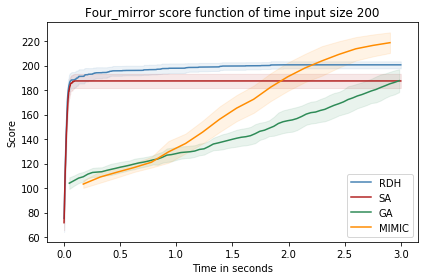

In [169]:
# Code to replot on a smaller time scale
time_max = 3
plt.title(problem_name+" score function of time input size "+str(size_input*coeff))
plt.xlabel("Time in seconds")
plt.ylabel("Score")

for algo in algorithms:
    num = algo['num']
    input_values = algo_scores_times[num-1]['times']
    input_values_shortened = np.extract(input_values <time_max, input_values)
    mean_values = mean_arrays[num-1]
    mean_values = mean_values[0:input_values_shortened.shape[0]]
    std_values = std_arrays[num-1]
    std_values = std_arrays[num-1][0:input_values_shortened.shape[0]]
    min_values = mean_values - std_values
    max_values = mean_values + std_values
    input_values = algo_scores_times[num-1]['times']
    plt.plot(input_values_shortened, mean_values, label=algo['key'], color=algo['color'])
    plt.fill_between(input_values_shortened, min_values, max_values, color=algo['color'], alpha=0.1)

plt.tight_layout()
plt.legend(loc="best")
plt.savefig('./graph/'+"TIME_SCORING_ZOOM_"+"time_frame_"+str(time_max)+problem_name+str(int(time.time()))+'.png')
plt.show()

# Neural Network Optimization

In [3]:
# Imports
from sklearn import tree
import graphviz 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

## Functions from precedent assignement

In [7]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


'''return scores of an estimator on a latex table format'''
def compute_score(clf,x_train,y_train,x_test,y_test, pos_label=1):
    y_predict_train = clf.predict(x_train_scaled)
    y_predict = clf.predict(x_test)
    dict_scores = {"acc_train":accuracy_score(y_train,y_predict_train),"acc_test":accuracy_score(y_test,y_predict),
                   "precision":precision_score(y_test,y_predict,pos_label=pos_label),'recall':recall_score(y_test,y_predict,pos_label=pos_label),
                  'f1_score':f1_score(y_test,y_predict,pos_label=pos_label),"Bacc":balanced_accuracy_score(y_test,y_predict)}
    string = "& "+str(round(accuracy_score(y_test,y_predict),2))+" & "+str(round(precision_score(y_test,y_predict,pos_label=pos_label),2))+" & "+str(round(recall_score(y_test,y_predict,pos_label=pos_label),2))+" & "+str(round(f1_score(y_test,y_predict,pos_label=pos_label),2))+" & "+str(round(balanced_accuracy_score(y_test,y_predict),2))
    return dict_scores,string


## Load the adult dataset

In [5]:
#load the datasets and remove lines with missing values
data_Adult_init = pd.read_csv('./Adult/adult.data', delimiter=',',names = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'],na_values = [" ",""," ?","?","n/a", "na", "--"])
data_Adult = data_Adult_init.dropna()

In [8]:
from sklearn.utils import shuffle
data_Adult = shuffle(data_Adult_init)
input_adult_init = data_Adult.iloc[:,0:data_Adult.shape[1]-1]
output_adult = data_Adult.iloc[:,data_Adult.shape[1]-1:data_Adult.shape[1]]
input_adult_init.drop("education", axis=1, inplace=True,)
#replace output value by numerical one
output_adult[output_adult.salary == " <=50K"] = -1
output_adult[output_adult.salary == " >50K"] = 1
input_adult = pd.get_dummies(input_adult_init)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_adult,output_adult,train_size=0.8,random_state=42)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
score=0
best = 0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
y_train_array = y_train.values.ravel()
x_test_scaled = scaler.fit_transform(x_test)

## Batch manager and state converter

In [29]:
def arraysToState(coefs,bias):
    N = np.reshape(coefs[0],-1)
    for i in range(1,len(coefs)):
        N = np.append(N,np.reshape(coefs[i],-1))
    for layer_bias in bias:
        N = np.append(N,layer_bias)
    return N
        
def stateToArrays(state,coefs,bias):
    coefs_list = []
    bias_list = []
    N = state
    k=0
    for layer_coefs in coefs:
        coefs_list.append(np.reshape(N[0:layer_coefs.shape[0]*layer_coefs.shape[1]],layer_coefs.shape))
        N = N[layer_coefs.shape[0]*layer_coefs.shape[1]:]
    for layer_bias in bias:
        bias_list.append(N[0:layer_bias.shape[0]])
        N = N[layer_bias.shape[0]:]
    return coefs_list, bias_list
        

from sklearn.metrics import log_loss
def log_loss_function(state,batchX,batchY,clf):
    clf.coefs_,clf.intercepts_ = stateToArrays(state,clf.coefs_,clf.intercepts_)
    batch_predicted = clf.predict_proba(batchX)
    return log_loss(batchY,batch_predicted)
        
def fitness_evaluation(state,batchManager,clf):
    try:
        [batchX,batchY] = batchManager.next_batch()
        val = log_loss_function(state,batchX,batchY,clf)
    
    except:
        return fitness_evaluation(state,batchManager,clf)
    return val

from sklearn.metrics import f1_score
def f1_score_function(state,batchX,batchY,clf):
    clf.coefs_,clf.intercepts_ = stateToArrays(state,clf.coefs_,clf.intercepts_)
    batch_predicted = clf.predict(batchX)
    return -f1_score(batchY,batch_predicted,pos_label=1)

def fitness_evaluation_f1(state,batchManager,clf):
    try:
        [batchX,batchY] = batchManager.next_batch()
        val = f1_score_function(state,batchX,batchY,clf)
    
    except:
        return fitness_evaluation(state,batchManager,clf)
    return val
        


In [31]:
#Imports
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import pickle

x_train_scaled = pickle.load(open( "./variables/"+"x_train_scaled.p", "rb" ))
x_test_scaled = pickle.load(open( "./variables/"+"x_test_scaled.p", "rb" ))
y_test = pickle.load(open( "./variables/"+"y_test.p", "rb" ))
y_train = pickle.load(open( "./variables/"+"y_train.p", "rb" ))
from imblearn.under_sampling import RandomUnderSampler

resample = True

if(resample):

    ros = RandomUnderSampler(random_state=0)
    ros.fit(x_train_scaled, y_train)
    x_train_scaled, y_train = ros.fit_resample(x_train_scaled, y_train)

from sklearn.utils import shuffle
class Batch_Manager:
    def __init__(self, x_train,y_train,batch_size):
        self.x_train = x_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.x_shuffle,self.y_shuffle  = shuffle(x_train,y_train)
        self.epoch = 0


    def next_batch(self):
        returnList =[]
        batch_size = self.batch_size
        if(self.y_shuffle.shape[0]<batch_size):
            self.x_shuffle,self.y_shuffle  = shuffle(self.x_train,self.y_train)
            self.epoch +=1
        returnList = [self.x_shuffle[0:batch_size].copy(),self.y_shuffle[0:batch_size].copy()]
        self.x_shuffle = self.x_shuffle[batch_size:]
        self.y_shuffle = self.y_shuffle[batch_size:]
        return returnList
    
import time
def compute_results_continuous(algorithm,problem,kwargs={},save=False):
    results = algorithm(problem,**kwargs)
    if(save):
        np.save("./variables/"+str(int(time.time())),results)
    return results


## Settings and problem parameters

In [ ]:

mode_time = True
brute_time = False
max_time = 60
tol = 0.00001
batch_size = 200

clf = pickle.load(open( "./variables/"+"Best_Neural_Adam_Adult_Gradient_Descent.p", "rb" ))
state_length = arraysToState(clf.coefs_,clf.intercepts_).shape[0]
max_attempts = 5*state_length
n_iter_no_change = int(y_train.shape[0]//batch_size)*100
init_state = np.random.uniform(low=-0.5, high=0.5, size=(state_length,))
stop_converged = True
step = 0.1
adaptive = True


# PARAMETERS

# Random Hill Climbing
params_RDH_NN = {'max_iters':np.inf,'max_attempts':max_attempts, 'restarts':0, 'init_state':init_state, 'curve':True, 'random_state':None,
                'max_time':max_time, 'brute_time':brute_time, 'full_explore':False, 'tol':tol, 'n_iter_no_change':n_iter_no_change,
                 'stop_converged':stop_converged, 'mode_time':mode_time, 'adaptive':adaptive}

# Simulated Annealing
params_SA_NN = {'max_attempts':max_attempts, 'max_iters':np.inf, 'init_state':init_state, 'curve':True, 'random_state':None,
               'max_time':max_time, 'brute_time':brute_time,'tol':tol, 'n_iter_no_change':n_iter_no_change,
                'stop_converged':stop_converged,'mode_time':mode_time,'adaptive':adaptive} # Take the default exponential decay rate

# Genetic Algorithm
params_GA_NN = {'pop_size':200, 'mutation_prob':0.1, 'max_attempts':max_attempts, 'max_iters':np.inf, 'curve':True, 'random_state':None,
               'max_time':max_time, 'brute_time':brute_time,'tol':tol, 'n_iter_no_change':n_iter_no_change,
                'stop_converged':stop_converged,'mode_time':mode_time,'adaptive':adaptive,'min_val':-1, 'max_val':3}

algorithms_NN = [{'key':'RDH', 'color':'SteelBlue','params':params_RDH_NN,'name':'Random Hill Climbing','alg':mlrose.random_hill_climb,'num':1},
               {'key':'SA', 'color':'FireBrick', 'params':params_SA_NN, 'name':'Simulated Annealing','alg':mlrose.simulated_annealing,'num':2},
               {'key':'GA', 'color':'SeaGreen', 'params':params_GA_NN, 'name':'Genetic Algorithm','alg':mlrose.genetic_alg,'num':3}]




batch_manager = Batch_Manager(x_train_scaled,y_train,batch_size)

kwargs = {'batchManager':batch_manager,'clf':clf}
fitness_function_loss = mlrose.CustomFitness(fitness_evaluation,**kwargs)
problem = mlrose.ContinuousOpt(state_length,fitness_function_loss, maximize=False, min_val=-1, max_val=3, step=step)
fitness_function_f1 = mlrose.CustomFitness(fitness_evaluation_f1,**kwargs)
problem_f1 = mlrose.ContinuousOpt(state_length,fitness_function_f1, maximize=False, min_val=-1, max_val=3, step=step)

In [18]:
clf.coefs_ = coefs
clf.intercepts_ = bias
compute_score(clf,x_train_scaled,y_train,x_test_scaled,y_test)

({'acc_train': 0.6516933207902164,
  'acc_test': 0.48165208045447566,
  'precision': 0.2967920118971744,
  'recall': 0.9548872180451128,
  'f1_score': 0.452836304700162,
  'Bacc': 0.6497208367453287},
 '& 0.48 & 0.3 & 0.95 & 0.45 & 0.65')

## Compute results for different parameters

In [31]:

algorithms_NN = [ {'key':'SA', 'color':'FireBrick', 'params':params_SA_NN, 'name':'Simulated Annealing','alg':mlrose.simulated_annealing,'num':2},
               {'key':'GA', 'color':'SeaGreen', 'params':params_GA_NN, 'name':'Genetic Algorithm','alg':mlrose.genetic_alg,'num':3}
    ,{'key':'RDH', 'color':'SteelBlue','params':params_RDH_NN,'name':'Random Hill Climbing','alg':mlrose.random_hill_climb,'num':1}
]


from imblearn.under_sampling import RandomUnderSampler

stop_converged = True
mode_time = True
brute_time = True
max_time = 60
tol = 0.00001
for algo in algorithms_NN:
    for batch_size in [50,200]:
        for adaptive in [True]:
            if(adaptive):
                step_range = [0.1]
            else:
                step_range = [0.1,0.01,0.001]
            for balanced in [True,False]:
                for step in step_range:
                    for repeat in range(5):
                        try:
                            x_train_scaled = pickle.load(open( "./variables/"+"x_train_scaled.p", "rb" ))
                            x_test_scaled = pickle.load(open( "./variables/"+"x_test_scaled.p", "rb" ))
                            y_test = pickle.load(open( "./variables/"+"y_test.p", "rb" ))
                            y_train = pickle.load(open( "./variables/"+"y_train.p", "rb" ))
                            if(balanced):
                                ros = RandomUnderSampler()
                                ros.fit(x_train_scaled, y_train)
                                x_train_scaled, y_train = ros.fit_resample(x_train_scaled, y_train)
                            n_iter_no_change = int(y_train.shape[0]//batch_size*100)
                            clf = pickle.load(open( "./variables/"+"Best_Neural_Adam_Adult_Gradient_Descent.p", "rb" ))
                            state_length = arraysToState(clf.coefs_,clf.intercepts_).shape[0]
                            init_state = np.random.uniform(low=-0.5, high=0.5, size=(state_length,))
                            coefs, bias = stateToArrays(init_state,clf.coefs_,clf.intercepts_)
                            clf.coefs_ = coefs
                            clf.intercepts_ = bias
                            clf.loss = 100
                            max_attempts = 5*state_length
                            # Random Hill Climbing
                            params_RDH_NN = {'max_iters':np.inf,'max_attempts':max_attempts, 'restarts':0, 'init_state':init_state, 'curve':True, 'random_state':None,
                                            'max_time':max_time, 'brute_time':brute_time, 'full_explore':False, 'tol':tol, 'n_iter_no_change':n_iter_no_change,
                                             'stop_converged':stop_converged, 'mode_time':mode_time}

                            # Simulated Annealing
                            params_SA_NN = {'max_attempts':max_attempts, 'max_iters':np.inf, 'init_state':init_state, 'curve':True, 'random_state':None,
                                           'max_time':max_time, 'brute_time':brute_time,'tol':tol, 'n_iter_no_change':n_iter_no_change,
                                            'stop_converged':stop_converged,'mode_time':mode_time} # Take the default exponential decay rate

                            # Genetic Algorithm
                            params_GA_NN = {'pop_size':200, 'mutation_prob':0.1, 'max_attempts':max_attempts, 'max_iters':np.inf, 'curve':True, 'random_state':None,
                                           'max_time':max_time, 'brute_time':brute_time,'tol':tol, 'n_iter_no_change':n_iter_no_change,
                                            'stop_converged':stop_converged,'mode_time':mode_time}

                            batch_manager = Batch_Manager(x_train_scaled,y_train,batch_size)

                            kwargs = {'batchManager':batch_manager,'clf':clf}
                            fitness_function_loss = mlrose.CustomFitness(fitness_evaluation,**kwargs)
                            problem = mlrose.ContinuousOpt(state_length,fitness_function_loss, maximize=False, min_val=-1, max_val=3, step=step)
                            results =compute_results_continuous(algo['alg'],problem,algo['params'])
                            state = results[0]
                            coefs, bias = stateToArrays(state,clf.coefs_,clf.intercepts_)
                            clf.coefs_ = coefs
                            clf.intercepts_ = bias
                            clf.loss_ = results[1]
                            dico,string = compute_score(clf,x_train_scaled,y_train,x_test_scaled,y_test)
                            table = [results,dico,string]
                            pickle.dump( table, open( "./variables/"+"NN_"+algo['key']+"btc_size-"+str(batch_size)+"_adaptive-"+str(adaptive)+
                                                       "_step_range-"+str(step_range)+"_balanced-"+str(balanced)+"_repeat-"+str(repeat)+".p", "wb" ) )
                            print(algo['key']+"btc_size-"+str(batch_size)+"_adaptive-"+str(adaptive)+"_step_range-"+str(step_range)+"_balanced-"+str(balanced)+"_repeat-"+str(repeat))
                            print(dico)
                        except:
                            print(algo['key']+"btc_size-"+str(batch_size)+"_adaptive-"+str(adaptive)+"_step_range-"+str(step_range)+"_balanced-"+str(balanced)+"_repeat-"+str(repeat))
                            print('Error')


    

SAbtc_size-50_adaptive-True_step_range-[0.1]_balanced-True_repeat-0
{'acc_train': 0.5895264973345876, 'acc_test': 0.7773683402425917, 'precision': 0.5100775193798449, 'recall': 0.22488038277511962, 'f1_score': 0.31214421252371916, 'Bacc': 0.5811530626746886}
SAbtc_size-50_adaptive-True_step_range-[0.1]_balanced-True_repeat-1
{'acc_train': 0.5067419253684541, 'acc_test': 0.23399355135882083, 'precision': 0.22666666666666666, 'recall': 0.9993164730006835, 'f1_score': 0.3695185138379881, 'Bacc': 0.5057968503617278}
SAbtc_size-50_adaptive-True_step_range-[0.1]_balanced-True_repeat-2
{'acc_train': 0.654123549702101, 'acc_test': 0.5275602640872102, 'precision': 0.3085863377609108, 'recall': 0.8892686261107313, 'f1_score': 0.45817925691142813, 'Bacc': 0.6560204516692271}
SAbtc_size-50_adaptive-True_step_range-[0.1]_balanced-True_repeat-3
{'acc_train': 0.6844622138601443, 'acc_test': 0.7254721326577614, 'precision': 0.4241008874357777, 'recall': 0.6206425153793574, 'f1_score': 0.50388457269700

## Retrieve computed data to make statistics and latex tables

In [48]:
import pickle
dico = []
for batch in [50,200]:
    for i in range(5):
        a = pickle.load(open("./variables/"+"NN_"+"SAbtc_size-"+str(batch)+"_adaptive-True_step_range-[0.1]_balanced-True_repeat-"+str(i)+".p","rb"))
        dico.append(a[1])
accuracy_tr = []
accuracy_test = []
precision = []
recall = []
f1_score = []
Bacc = []
Loss =[]
for d in dico:
    accuracy_tr.append(d['acc_train'])
    accuracy_test.append(d['acc_test'])
    precision.append(d['precision'])
    recall.append(d['recall'])
    f1_score.append(d['f1_score'])
    Bacc.append(d['Bacc'])
    Loss.append(a[0][1])

In [49]:
import numpy as np
L = [accuracy_tr,accuracy_test,precision,recall,f1_score,Bacc,Loss]
name = ['acc_train','acc_test','precision','recall','f1_score','Bacc','Loss']
string = ""
stringstd = ""
for i in range(len(L)):
    string += str(round(np.mean(np.array(L[i])),2)) +" & "
    stringstd+=str(round(np.std(np.array(L[i])),2)) +" & "
print(string)
print(stringstd)


0.66 & 0.65 & 0.4 & 0.68 & 0.46 & 0.66 & 0.64 & 
0.07 & 0.16 & 0.08 & 0.23 & 0.07 & 0.07 & 0.0 & 


In [41]:
a1 = pickle.load(open("./variables/"+"F1_NN_"+"GAbtc_size-"+str(50)+"_adaptive-True_step_range-[0.1]_balanced-False_repeat-"+str(1)+".p","rb"))
a2 = pickle.load(open("./variables/"+"F1_NN_"+"GAbtc_size-"+str(200)+"_adaptive-True_step_range-[0.1]_balanced-False_repeat-"+str(1)+".p","rb"))
r = stateToArrays(a1[0][0],clf.coefs_,clf.intercepts_)
np.where(r[0][2] != 0)

(array([15]), array([0]))